In [1]:
# Importing the libraries
import os
import glob
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import missingno as msno
plt.style.use('ggplot')

In [2]:
# Importing the dataset
melanoma_data = pd.read_csv("../input/siim-isic-melanoma-classification/train.csv")
melanoma_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [3]:
# Checking the info of the data
melanoma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [4]:
# Checking for missing values in the dataset
melanoma_data.isnull().sum()/len(melanoma_data)*100

image_name                       0.000000
patient_id                       0.000000
sex                              0.196220
age_approx                       0.205277
anatom_site_general_challenge    1.590895
diagnosis                        0.000000
benign_malignant                 0.000000
target                           0.000000
dtype: float64

In [5]:
# Filling the missing values 
melanoma_data["sex"].fillna("unknown", inplace=True)
melanoma_data["age_approx"].fillna(melanoma_data.age_approx.mode().values[0], inplace=True)
melanoma_data["anatom_site_general_challenge"].fillna("unknown", inplace=True)

In [6]:
# Checking for missing values in the dataset
melanoma_data.isnull().sum()/len(melanoma_data)*100

image_name                       0.0
patient_id                       0.0
sex                              0.0
age_approx                       0.0
anatom_site_general_challenge    0.0
diagnosis                        0.0
benign_malignant                 0.0
target                           0.0
dtype: float64

In [7]:
# Looking at the number of unique values
melanoma_data["anatom_site_general_challenge"].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
unknown              527
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [8]:
melanoma_data["sex"].value_counts()

male       17080
female     15981
unknown       65
Name: sex, dtype: int64

In [9]:
melanoma_data["diagnosis"].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [10]:
melanoma_data["target"].value_counts()

0    32542
1      584
Name: target, dtype: int64

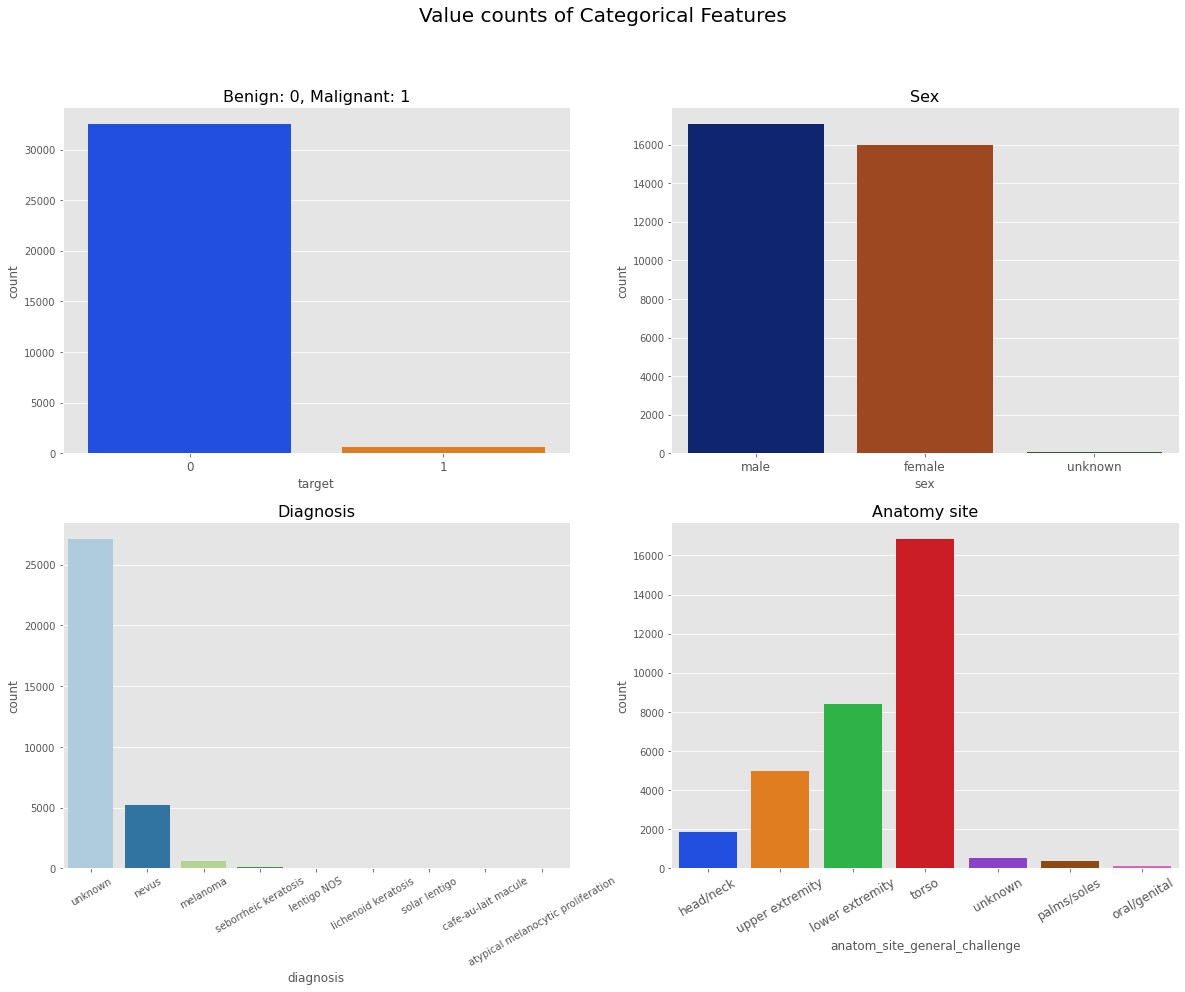

In [11]:
# Plotting a countplot to check the variable count of Categorical Features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
fig.suptitle("Value counts of Categorical Features", fontsize=20)

sns.countplot(ax=axes[0,0], data=melanoma_data, x="target", palette="bright")
axes[0,0].set_title("Benign: 0, Malignant: 1", fontsize=16)
axes[0,0].tick_params(axis = 'x',labelsize = 'large')

sns.countplot(ax=axes[0,1], data=melanoma_data, x="sex", palette="dark")
axes[0,1].set_title("Sex", fontsize=16)
axes[0,1].tick_params(axis = 'x',labelsize = 'large')

sns.countplot(ax=axes[1,0], data=melanoma_data, x="diagnosis", palette="Paired")
axes[1,0].set_title("Diagnosis", fontsize=16)
axes[1,0].tick_params(axis = 'x',rotation=30, labelsize = 'medium')

sns.countplot(ax=axes[1,1], data=melanoma_data, x="anatom_site_general_challenge", palette="bright")
axes[1,1].set_title("Anatomy site", fontsize=16)
axes[1,1].tick_params(axis = 'x',rotation=30, labelsize = 'large')

plt.show()

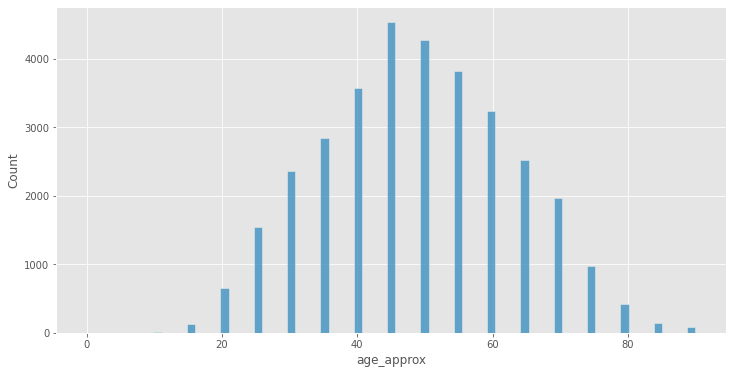

In [12]:
# Plotting histogram to see Age distribution
plt.figure(figsize=(12,6))
sns.histplot(melanoma_data, x="age_approx")
plt.show()